In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers

Using TensorFlow backend.


In [3]:
from keras.datasets import reuters
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
np.load = np_load_old

In [6]:
print("Number of unique words:", len(np.unique(np.hstack(train_data))))
length = [len(i) for i in train_data]
print("Average Review Length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Number of unique words: 9982
Average Review Length: 145.5398574927633
Standard Deviation: 146.0


In [12]:
print("Label:", train_labels[0])

Label: 3


In [13]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [27]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i-3,"?") for i in train_data[1]])
print(decoded_review)

? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3


In [30]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [32]:
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")

[ 3.  4.  3. ... 25.  3. 25.]


In [34]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:

model = models.Sequential()

# Input-Layer
model.add(layers.Dense(16,activation="relu",input_shape=(10000,)))

# Hidden-Layers
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(55,activation="relu"))
model.add(layers.Dropout(0.4, noise_shape=None, seed=None))
model.add(layers.Dense(85,activation="relu"))
model.add(layers.Dense(85,activation="relu"))
model.add(layers.Dense(85,activation="relu"))
model.add(layers.Dropout(0.4, noise_shape=None, seed=None))
model.add(layers.Dense(55,activation="relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(16,activation="relu"))

# Output-Layer
model.add(layers.Dense(46, activation="softmax"))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 55)                935       
_________________________________________________________________
dropout_2 (Dropout)          (None, 55)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 85)                4760      
_________________________________________________________________
dense_4 (Dense)      

In [36]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [40]:
x_val = x_train[:4000]
partial_x_train = x_train[4000:]
y_val = y_train[:4000]
partial_y_train = y_train[4000:]
print(partial_x_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [51]:
history = model.fit(
partial_x_train, partial_y_train,
epochs=10,
batch_size=512,
validation_data=(x_val,y_val)
)

Train on 4982 samples, validate on 4000 samples
Epoch 1/10
4982/4982 [==============================] - 1s 300us/step - loss: 0.0339 - acc: 0.9902 - val_loss: 0.0582 - val_acc: 0.9882
Epoch 2/10
4982/4982 [==============================] - 1s 299us/step - loss: 0.0334 - acc: 0.9905 - val_loss: 0.0583 - val_acc: 0.9884
Epoch 3/10
4982/4982 [==============================] - 1s 301us/step - loss: 0.0331 - acc: 0.9906 - val_loss: 0.0590 - val_acc: 0.9884
Epoch 4/10
4982/4982 [==============================] - 1s 297us/step - loss: 0.0326 - acc: 0.9909 - val_loss: 0.0608 - val_acc: 0.9886
Epoch 5/10
4982/4982 [==============================] - 1s 301us/step - loss: 0.0324 - acc: 0.9912 - val_loss: 0.0600 - val_acc: 0.9887
Epoch 6/10
4982/4982 [==============================] - 2s 306us/step - loss: 0.0315 - acc: 0.9914 - val_loss: 0.0612 - val_acc: 0.9888
Epoch 7/10
4982/4982 [==============================] - 2s 304us/step - loss: 0.0308 - acc: 0.9917 - val_loss: 0.0607 - val_acc: 0.9889


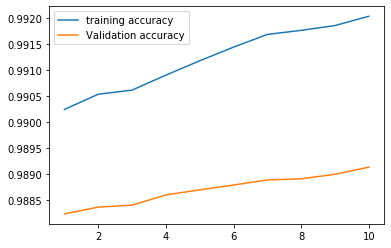

In [52]:
history_dict = history.history
loss_values = history_dict["loss"]

plt.clf()

acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, label = "training accuracy")
plt.plot(epochs, val_acc_values, label ="Validation accuracy")
plt.legend()
plt.show()

In [50]:
print("Validation Accuracy:", np.mean(val_acc_values))

Validation Accuracy: 0.9882503665924073
